# 6. 时间控制

### 不隔周策略

scheduler.run_weekly(buy, tradingday=1, time_rule=market_open(minute=10))

scheduler.run_weekly(close, tradingday=-1, time_rule=market_close(minute=10))

### 不隔夜策略
scheduler.run_daily(buy,time_rule=market_open(minute=10))

scheduler.run_daily(close, time_rule=market_close(minutue=10))

buy: 2017-10-23 15:00:00
close: 2017-10-27 15:00:00
buy: 2017-10-30 15:00:00
close: 2017-11-03 15:00:00
buy: 2017-11-06 15:00:00
close: 2017-11-10 15:00:00
buy: 2017-11-13 15:00:00
close: 2017-11-17 15:00:00
buy: 2017-11-20 15:00:00


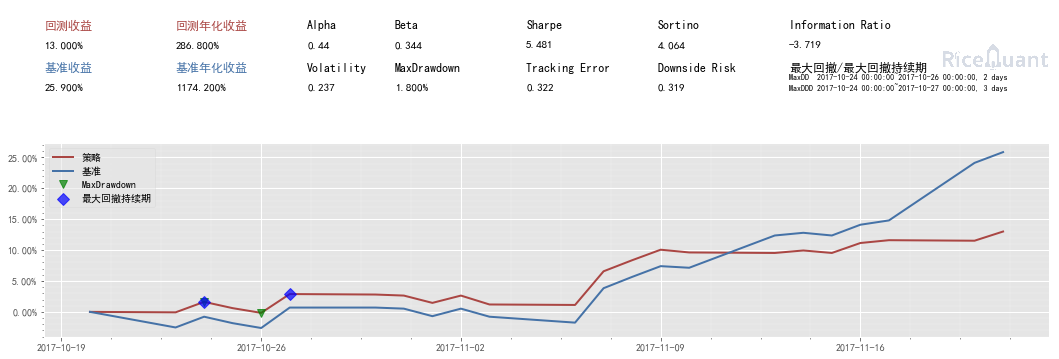

{'sys_analyser': {'summary': {'strategy_name': 'strategy',
   'start_date': '2017-10-20',
   'end_date': '2017-11-21',
   'strategy_file': 'strategy.py',
   'run_type': 'BACKTEST',
   'benchmark': '000001.XSHE',
   'STOCK': 1000000.0,
   'alpha': 0.44,
   'beta': 0.344,
   'sharpe': 5.481,
   'information_ratio': -3.719,
   'downside_risk': 0.319,
   'tracking_error': 0.322,
   'sortino': 4.064,
   'volatility': 0.237,
   'max_drawdown': 0.018,
   'total_value': 1130102.793,
   'cash': 55022.793,
   'total_returns': 0.13,
   'annualized_returns': 2.868,
   'unit_net_value': 1.13,
   'units': 1000000.0,
   'benchmark_total_returns': 0.259,
   'benchmark_annualized_returns': 11.742},
  'trades':                      commission         exec_id  last_price  last_quantity  \
  datetime                                                                     
  2017-10-23 15:00:00    759.1296  15337103350090       11.19          84800   
  2017-10-27 15:00:00    784.2304  15337103350091       11.

In [19]:
## 具体不隔周例子：

import rqalpha
from rqalpha.api import *

def init(context):
    context.s1 = '000001.XSHE'
    scheduler.run_weekly(buy, tradingday=1)
    scheduler.run_weekly(close, tradingday=-1)

def handle_bar(context, bar_dict):
    pass

def buy(context, bar_dict):
    cur_position = context.portfolio.positions[context.s1].quantity
    if cur_position==0:
        order_target_percent(context.s1, 0.95)
        print('buy:', context.now)

def close(context, bar_dict):
    cur_position = context.portfolio.positions[context.s1].quantity
    if cur_position>0:
        order_target_value(context.s1, 0)
        print('close:', context.now)

config = {
  "base": {
    "start_date": "2017-10-20",
    "end_date": "2017-11-21",
    "accounts": {'stock':1000000},
    "benchmark": "000001.XSHE"
  },
  "extra": {
    "log_level": "error",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)